<a href="https://colab.research.google.com/github/guimazzolino/MVP-I/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP I - Guilherme Fernandes Viana Mazzolino

### O dataset utilizado é importado do Departamento de Cuidados de Saúde Gerenciados pela Califórnia (DMHC), a qual contém todas as decisões de Revisões Médicas Independentes (IMR) administradas desde 1° de Janeiro de 2001. A base de dados possui 10 colunas e 19.246 observações, onde as variáveis são:

 **Reference ID**: Identificador

 **Report Year**: O ano (variando entre 2001 e 2016) em número int

 **Diagnosis Category**: Os diagnósticos realizados

 **Diagnosis Sub Category**: As sub categorias diagnosticadas

 **Treatment Category**: Os tratamentos indicados

 **Treatment Sub Category**: Os sub tratamentos indicados pelo DMHC

 **Determination**: Se a determinação do Plano de Saúde foi Mantida ou Negada

 **Type**: Se foi por necessidade médica, investigação/experimental ou tratamento de emergência

 **Age Range**: Faixa Etária

 **Patient Gender**: O sexo do paciente, dividindo-se em Male (Sexo Masculino) e Female (Sexo Feminino)

 -------------------------------------------------------------------------------

O principal objetivo deste primeiro MVP é de identificar possíveis padrões de doenças diagnosticadas e os principais tratamentos utilizados, a fim de traçar um perfil para que o DMHC tenha uma maior assertividade no tratamento e que consiga, a partir de campanhas especializadas, diminuir algumas doenças diagnosticadas e tratadas.


In [1]:
## Importação dos pacotes a serem utilizados, bem como a base disponibilizaada no Github
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

url = 'https://raw.githubusercontent.com/guimazzolino/MVP-I/main/Independent_Medical_Review__IMR__Determinations__Trend.csv'
dataset = pd.read_csv(url, sep=';')

# Para observarmos as informações de cada coluna do dataset
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19228 entries, 0 to 19227
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19228 non-null  object
 1   Report Year             19228 non-null  int64 
 2   Diagnosis Category      19169 non-null  object
 3   Diagnosis Sub Category  17324 non-null  object
 4   Treatment Category      18778 non-null  object
 5   Treatment Sub Category  17960 non-null  object
 6   Determination           19228 non-null  object
 7   Type                    19228 non-null  object
 8   Age Range               18033 non-null  object
 9   Patient Gender          18033 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.5+ MB


In [2]:
# O cabeçalho das 5 primeiras linhas do Dataset

dataset.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male


In [3]:
# Feito a importação dos dados e todos os pacotes a serem utilizados, apresentarei as principais estatísticas descritivas presentes na Base de Dados:
colunas = dataset.columns[1:]

# Loop pelas colunas selecionadas do DataFrame
for coluna in colunas:
    # Obtém as frequências da coluna atual
    frequencias = dataset[coluna].value_counts()
    
    # Calcula as frequências em porcentagem e em valor absoluto
    frequencias_pct = (frequencias / len(dataset)) * 100
    frequencias_abs = frequencias
    
    # Cria um DataFrame com as frequências em porcentagem e em valor absoluto
    df_frequencias = pd.DataFrame({'n': frequencias_abs, 'Frequência (%)': frequencias_pct})
    
    # Imprime o resultado
    print(f'Frequências de {coluna}:')
    print(df_frequencias)
    print('\n')

Frequências de Report Year:
         n  Frequência (%)
2015  2082       10.827959
2008  1519        7.899938
2011  1445        7.515082
2010  1442        7.499480
2009  1441        7.494279
2014  1432        7.447472
2007  1343        6.984606
2016  1307        6.797379
2013  1221        6.350114
2012  1205        6.266902
2006  1082        5.627210
2005   965        5.018723
2004   778        4.046183
2003   739        3.843353
2002   691        3.593717
2001   536        2.787601


Frequências de Diagnosis Category:
                                          n  Frequência (%)
Orthopedic/ Musculoskeletal            3466       18.025796
Mental                                 2510       13.053880
Cancer                                 1680        8.737258
Central Nervous System/ Neuromuscular  1619        8.420012
Infectious                             1056        5.491991
Cardiac/Circulatory                     965        5.018723
Morbid Obesity                          824        4.285

In [4]:
## Agora, com a visualização das frequências das variáveis disponíveis no meu dataset, farei alguns pequenos ajustes, como:

# Padronização das faixas de idade
dataset['Age Range'] = dataset['Age Range'].str.replace('_', '-')

# Retirada de "of Health Plan" na variável Determination
dataset['Determination'] = dataset['Determination'].str.split('of').str[0]


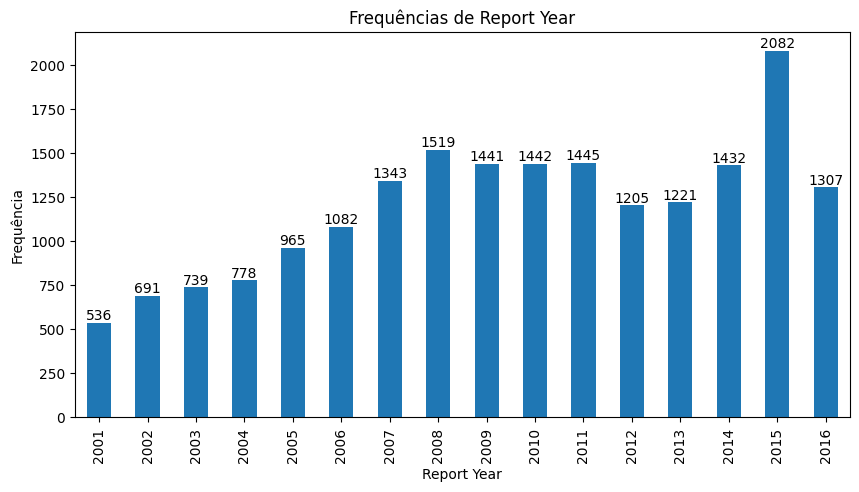

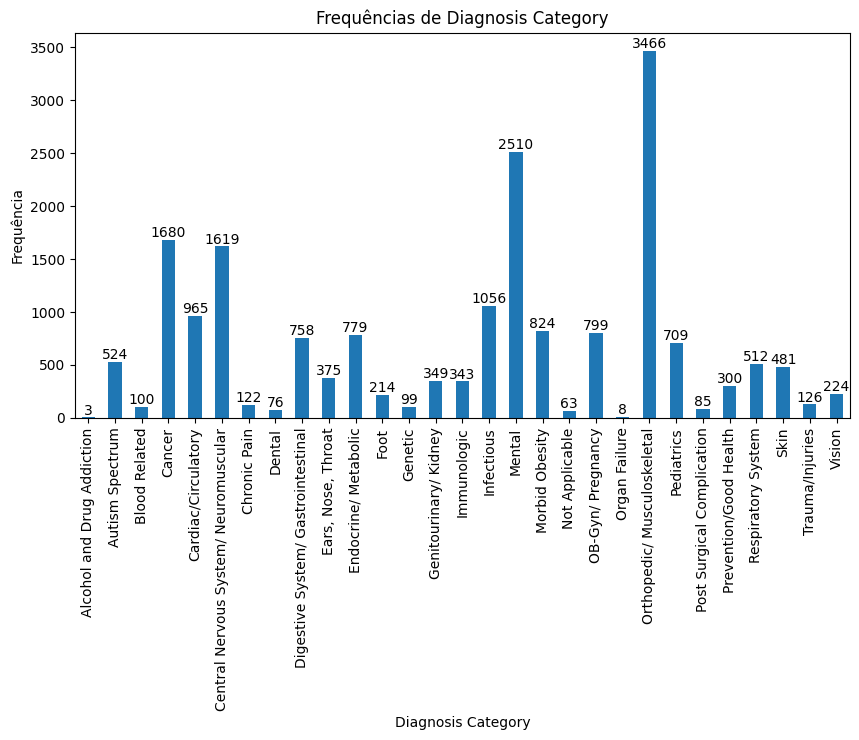

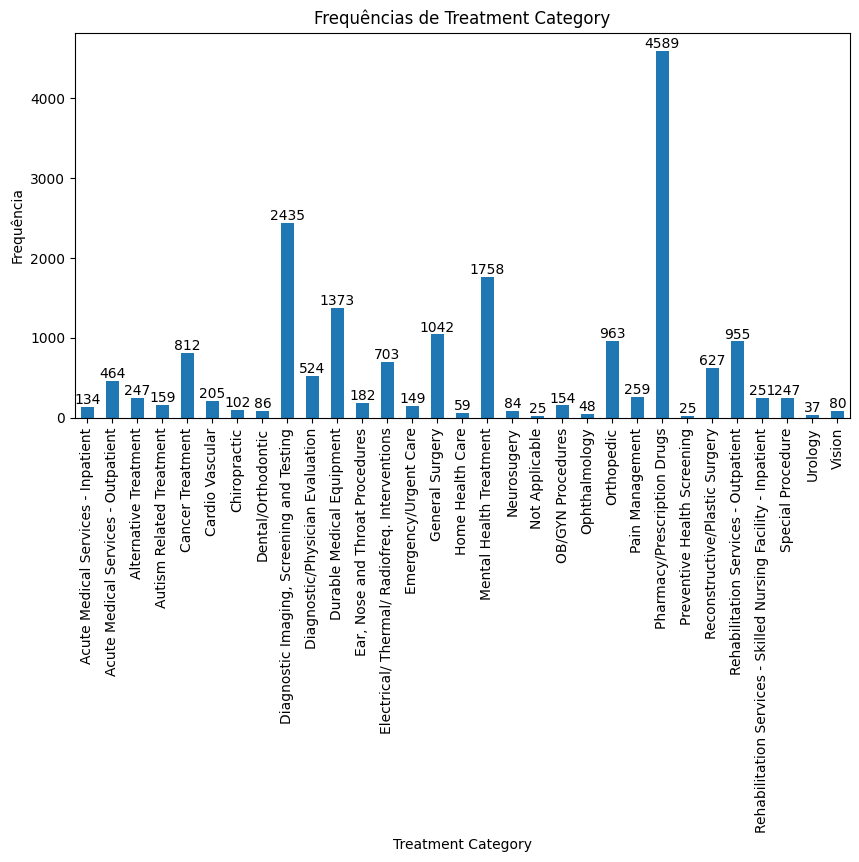

In [5]:
# Farei, agora, os gráficos de Frequência de ocorrência por Anos, Categorias de Diagnósticos e Categorias de Tratamentos

# Seleciona as colunas referentes às 3 variáveis desejadas
colunas = dataset.columns[[1,2,4]]

# Loop pelas colunas selecionadas do DataFrame
for coluna in colunas:
    # Cria o gráfico de barras
    fig, ax = plt.subplots(figsize=(10, 5))
    dataset[coluna].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Frequências de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    ax.bar_label(ax.containers[0])
    
    # Mostra o gráfico
    plt.show()





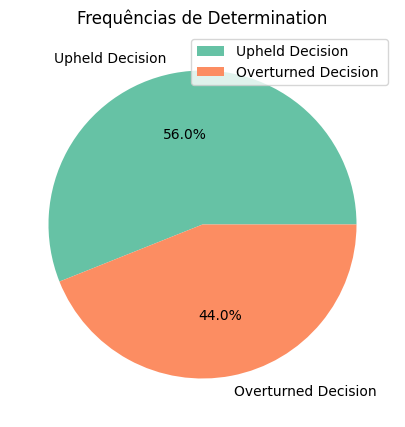

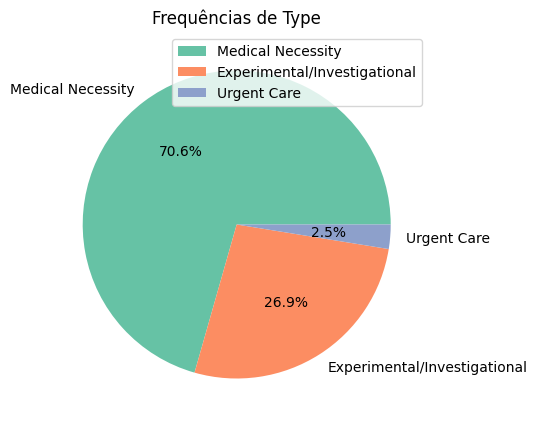

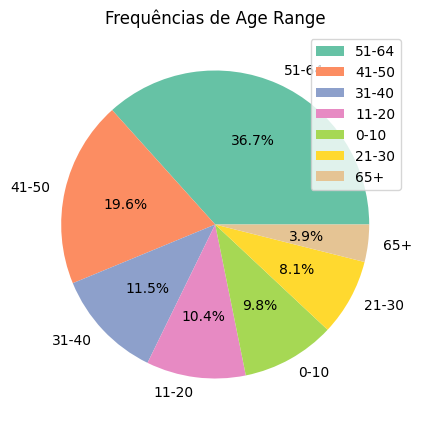

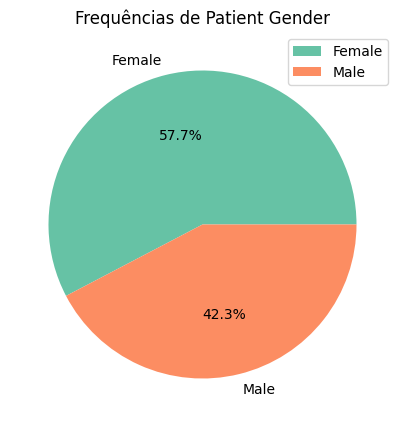

In [7]:
colunas = dataset.columns[[6,7,8,9]]

# Loop pelas colunas selecionadas do DataFrame
for coluna in colunas:
    # Cria o gráfico de pizza
    fig, ax = plt.subplots(figsize=(10, 5))
    dataset[coluna].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
    sns.set_palette('Set2')
    ax.set_title(f'Frequências de {coluna}')
    ax.set_ylabel('')
    # Adiciona o rótulo de dados
    ax.legend(dataset[coluna].value_counts().index, loc='upper right')
    
    # Mostra o gráfico
    plt.show()


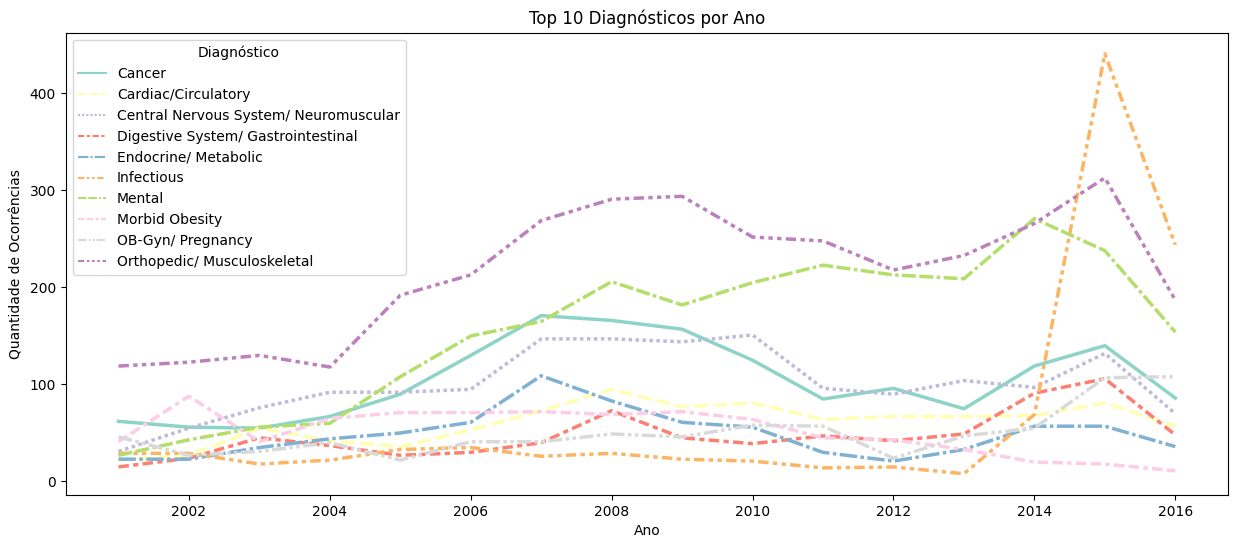

In [8]:
## Agora, plota-se os gráficos dos Top10 de Diagnósticos por Ano, para sabermos se alguma doença teve apenas um surto ou se deve ser acompanhada

# Conta a frequência de cada diagnóstico e seleciona os 10 maiores
top_10_diseases = dataset['Diagnosis Category'].value_counts().nlargest(10).index

# Definição da paleta de cores
my_palette = sns.color_palette("pastel", n_colors=10)

# Filtra o dataframe original para incluir apenas os 10 maiores diagnósticos
df_top_10 = dataset[dataset['Diagnosis Category'].isin(top_10_diseases)]

# Agrupa os dados por ano e diagnóstico e obtém a contagem de cada grupo
grouped = df_top_10.groupby(['Report Year', 'Diagnosis Category']).size()

# Transforma os dados em uma tabela com anos nas linhas e diagnósticos nas colunas
stacked = grouped.unstack()

# Plota o gráfico de linhas
plt.figure(figsize=(15,6))
sns.lineplot(data=stacked, palette='Set3', linewidth=2.5)

# Define o título, legenda e os rótulos dos eixos
plt.title('Top 10 Diagnósticos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Ocorrências')
plt.legend(title='Diagnóstico')


plt.show()


Como pode-ser perceber, os dois maiores diagnósticos (doenças ortopédicas e mentais) possuem uma maior observância ao longo dos anos, enquanto a infecção teve um grande surto e observando uma grande alta nos casos em 2015, comparado aos anos anteriores.

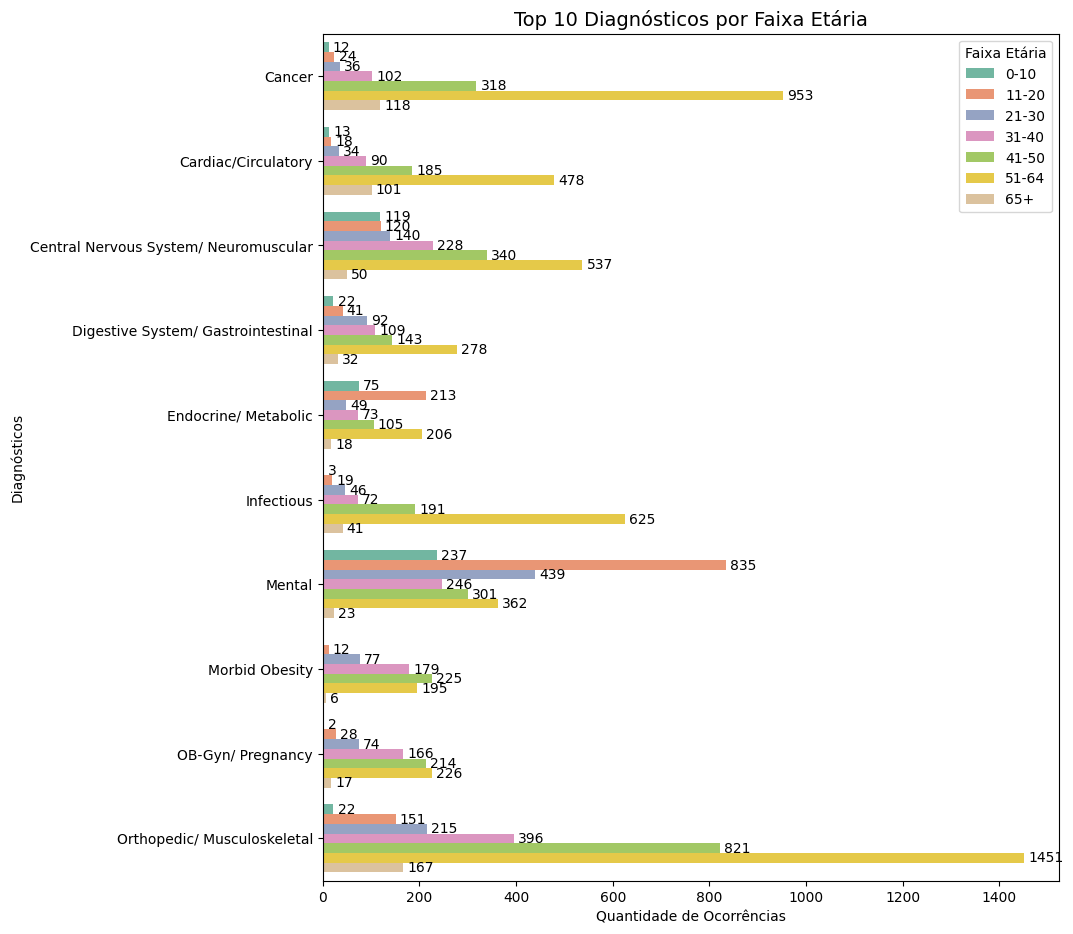

In [9]:
#Como são diversas faixas etárias para análise em cada um dos diagnósticos, farei o mesmo gráfico anterior, mas com gráfico de barra

# Seleciona os 10 principais diagnósticos
top_10_diseases = dataset['Diagnosis Category'].value_counts().nlargest(10).index

# Filtra o dataframe original para incluir apenas os 10 maiores diagnósticos
df_top_10 = dataset[dataset['Diagnosis Category'].isin(top_10_diseases)]

# Agrupa os dados por gênero e categoria de diagnóstico
grouped = df_top_10.groupby(['Diagnosis Category', 'Age Range'])

# Obtem o número total de ocorrências de cada doença
counts = grouped.size().reset_index(name='count')

# Define o tamanho da figura
plt.figure(figsize=(9.5, 11))

# Cria o gráfico de barras
ax = sns.barplot(x='count', y='Diagnosis Category', hue='Age Range', data=counts, dodge=True, palette='Set2')

# Define o título, legenda e os rótulos dos eixos
plt.title('Top 10 Diagnósticos por Faixa Etária', fontsize=14)
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Diagnósticos')
plt.legend(title='Faixa Etária', loc='upper right')

# Adiciona os rótulos de dados
# Adiciona os rótulos dos valores das barras
for rect in ax.containers:
    ax.bar_label(rect, padding=3, label_type='edge')

    
# Mostra o gráfico
plt.show()


Como vimos nas estatísticas básicas do dataset, pode-se perceber que, em sua maioria, a faixa etária entre 50 e 64 anos possui a maior representatividade na maioria dos diagnósticos realizados, exceto nas doenças mentais e metabólicas, as quais são a maioria no público entre 11 e 20 anos.

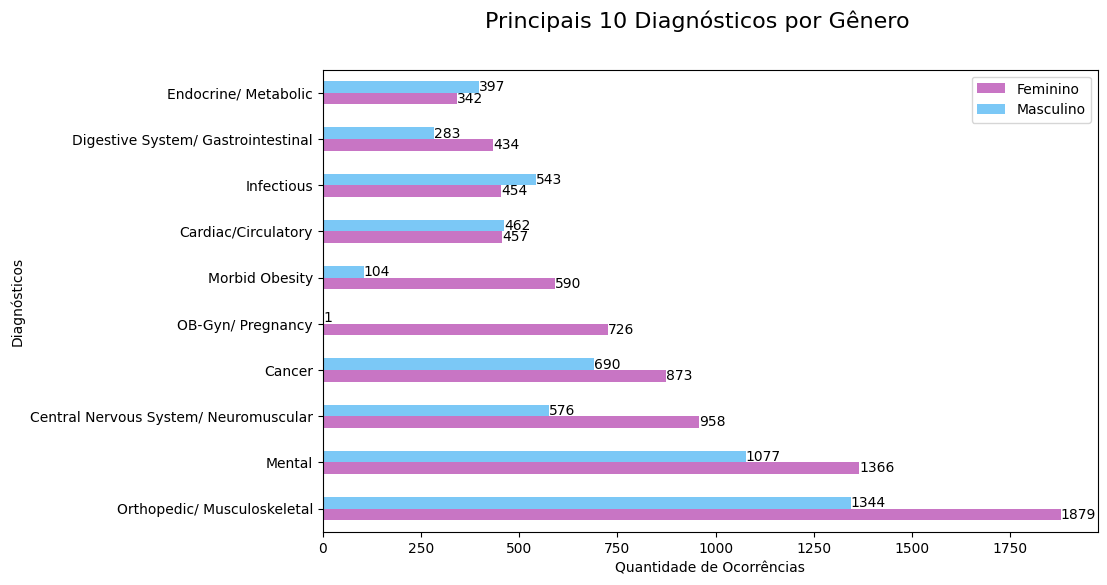

Patient Gender                            Female       Male
Diagnosis Category                                         
Orthopedic/ Musculoskeletal            58.299721  41.700279
Mental                                 55.914859  44.085141
Central Nervous System/ Neuromuscular  62.451108  37.548892
Cancer                                 55.854127  44.145873
OB-Gyn/ Pregnancy                      99.862448   0.137552
Morbid Obesity                         85.014409  14.985591
Cardiac/Circulatory                    49.727965  50.272035
Infectious                             45.536610  54.463390
Digestive System/ Gastrointestinal     60.529986  39.470014
Endocrine/ Metabolic                   46.278755  53.721245


In [10]:
# Neste primeiro momento, avaliarei os 10 maiores diagnósticos divididos por Gênero, para saber se existe alguma evidência sobre esta correlação.

top_10_diseases = dataset['Diagnosis Category'].value_counts().nlargest(10).index
df_top_10 = dataset[dataset['Diagnosis Category'].isin(top_10_diseases)]

# Calcula a frequência geral de cada doença
total_counts = df_top_10['Diagnosis Category'].value_counts()

# Agrupa os dados por gênero e categoria de diagnóstico
grouped = df_top_10.groupby(['Diagnosis Category', 'Patient Gender'])

# Obtem o número total de ocorrências de cada doença em cada gênero
counts = grouped.size()

# Calcula a porcentagem de cada gênero para cada doença
percentages = counts.div(total_counts, level='Diagnosis Category') * 100

# Transforma os dados em uma tabela com doenças nas linhas e gênero nas colunas
stacked = counts.unstack().sort_values('Female',ascending = False)

# Cria o gráfico de barras
ax = stacked.plot(kind='barh', position=0.5, figsize=(10, 6), color=['#C875C4','#7BC8F6'])

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Principais 10 Diagnósticos por Gênero', fontsize=16)
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Diagnósticos')
plt.legend(title='Gênero')
ax.legend(['Feminino', 'Masculino'], loc='upper right')
plt.subplots_adjust(hspace=0.4)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
# Mostra o gráfico
plt.show()


#Mostra a tabela com os percentuais dos gêneros em cada um dos Diagnósticos
stacked['Total'] = stacked.sum(axis=1)
stacked_pct = stacked.iloc[:, :-1].div(stacked['Total'], axis=0)*100
print(stacked_pct)

### Ao analisar o gráfico junto à tabela com os percentuais das frequências dos diagnósticos por gênero, podemos observar que o sexo feminino possui uma grande percentual de diagnósticos, sobretudo em gravidezes (por motivos mais previsíveis), seguidos de obesidade mórbida, sistema nervoso central/neuromuscular e sistema digestivo/gatrointestinal.

Como se observou uma representatividade expressiva e um percentual mais elevado, para as posteriores análises serão consideradas, somente, os 3 diagnósticos citados anteriormente.

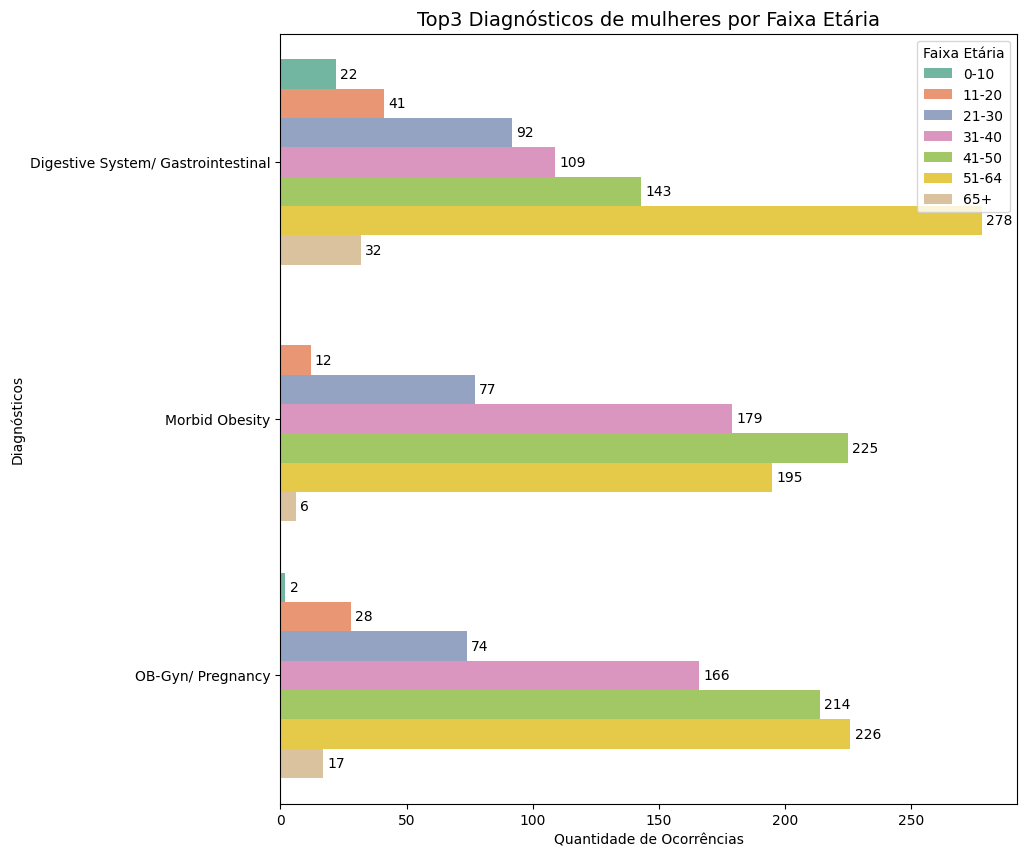

In [12]:
# Basicamente repetirei o gráfico anterior, mas com 
data = dataset[(dataset['Diagnosis Category'] == 'OB-Gyn/ Pregnancy') | (dataset['Diagnosis Category']== 'Morbid Obesity') | (dataset['Diagnosis Category'] =='Digestive System/ Gastrointestinal') ]

top_10_diseases = data['Diagnosis Category'].value_counts().index
df_top_10 = data[data['Diagnosis Category'].isin(top_10_diseases)]

grouped = df_top_10.groupby(['Diagnosis Category', 'Age Range'])

# Obtem o número total de ocorrências de cada doença
counts = grouped.size().reset_index(name='count')

# Define o tamanho da figura
plt.figure(figsize=(9.5, 10))

# Cria o gráfico de barras
ax = sns.barplot(x='count', y='Diagnosis Category', hue='Age Range', data=counts, dodge=True, palette='Set2')

# Define o título, legenda e os rótulos dos eixos
plt.title('Top3 Diagnósticos de mulheres por Faixa Etária', fontsize=14)
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Diagnósticos')
plt.legend(title='Faixa Etária', loc='upper right')

# Adiciona os rótulos de dados
# Adiciona os rótulos dos valores das barras
for rect in ax.containers:
    ax.bar_label(rect, padding=3, label_type='edge')

    
# Mostra o gráfico
plt.show()


A partir deste gráfico, podemos observar que a maioria dos diagnósticos se encontra, quase que em sua totalidade, em mulheres entre 51 e 64 anos, visto que apenas o diagnóstico de obesidade mórbida foi majoritária entre mulheres de 41 a 50 anos (faixa etária que é a segunda mais representativa entre os diagnósticos).

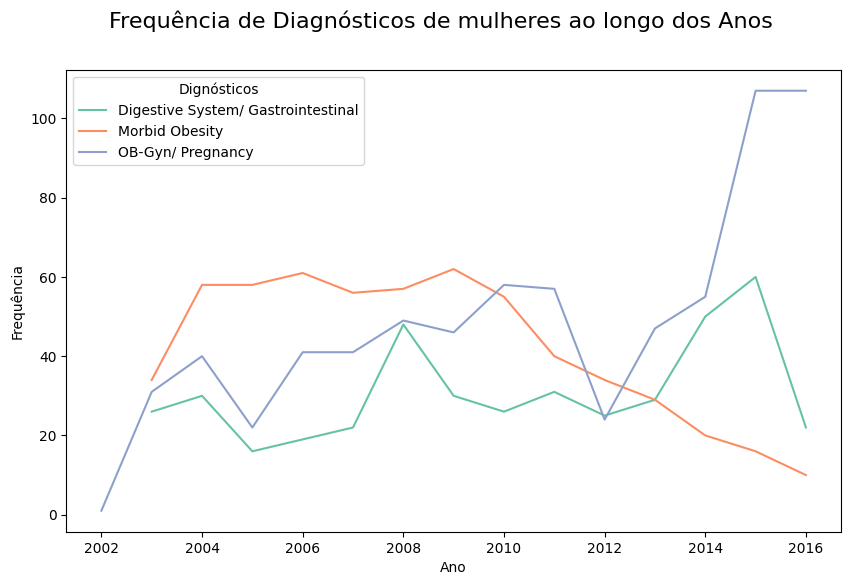

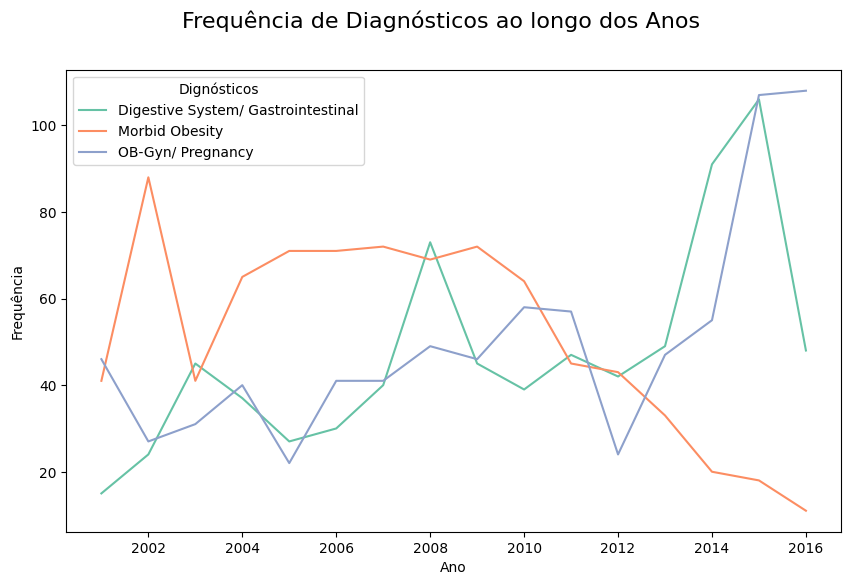

In [13]:
# Por fim, para esta análise dos 3 maiores diagnósticos reportado na base de dados em mulheres, se fará o acompanhamento das doenças ao longo dos anos:

# Filtra as doenças desejadas
diseases = ['Morbid Obesity', 'OB-Gyn/ Pregnancy', 'Digestive System/ Gastrointestinal']
data = dataset[dataset['Patient Gender'] =='Female']

# Cria uma tabela dinâmica com as frequências de cada doença por ano
table = pd.pivot_table(
    data[data['Diagnosis Category'].isin(diseases)],
    values='Reference ID', 
    index='Report Year', 
    columns='Diagnosis Category', 
    aggfunc='count'
)

# Cria um gráfico de linhas com cada doença como uma série separada
table.plot(kind='line', figsize=(10, 6))

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Frequência de Diagnósticos de mulheres ao longo dos Anos', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.legend(title='Dignósticos')

# Mostra o gráfico
plt.show()




# Já neste gráfico, serão utilizados todos os gêneros de toda a população presente na base de dados

# Filtra as doenças desejadas
diseases = ['Morbid Obesity', 'OB-Gyn/ Pregnancy', 'Digestive System/ Gastrointestinal']
data = dataset

# Cria uma tabela dinâmica com as frequências de cada doença por ano
table = pd.pivot_table(
    data[data['Diagnosis Category'].isin(diseases)],
    values='Reference ID', 
    index='Report Year', 
    columns='Diagnosis Category', 
    aggfunc='count'
)

# Cria um gráfico de linhas com cada doença como uma série separada
table.plot(kind='line', figsize=(10, 6) )

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Frequência de Diagnósticos ao longo dos Anos', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.legend(title='Dignósticos')

# Mostra o gráfico
plt.show()

Por fim, pode-se chegar a algumas conclusões ao analisar os dois gráficos e os demais gerados anteriormente:

(1) Há uma forte tendência de redução de diagnósticos e, por conseguinte, ocorrências de Obesidade Mórbida neste hospital.

(2) Há uma tendência, desde 2012, de uma maior taxa de gravidez.

(3) Apesar de se manter em um patamar acima da obesidade mórbida desde 2013, a gastrointerite/sistema digestivo teve uma considerável queda no ano de 2016, ao compará-lo com 2015.

Desse modo, seria interessante uma campanha de conscientização ou um tratamento preventivo em mulheres, sobretudo acima dos 40 anos, para que uma redução do patamar de gastrointerite/sistema digestivo.


### Agora, tentarei dar um maior enfoque para os 2 maiores diganósticos observados: Orthopedic/ Musculoskeletal & Mental

Frequências de Treatment Category:
Treatment Category
Mental Health Treatment                          1700
Pharmacy/Prescription Drugs                       236
Electrical/ Thermal/ Radiofreq. Interventions     196
Rehabilitation Services - Outpatient              130
Diagnostic Imaging, Screening and Testing          45
dtype: int64




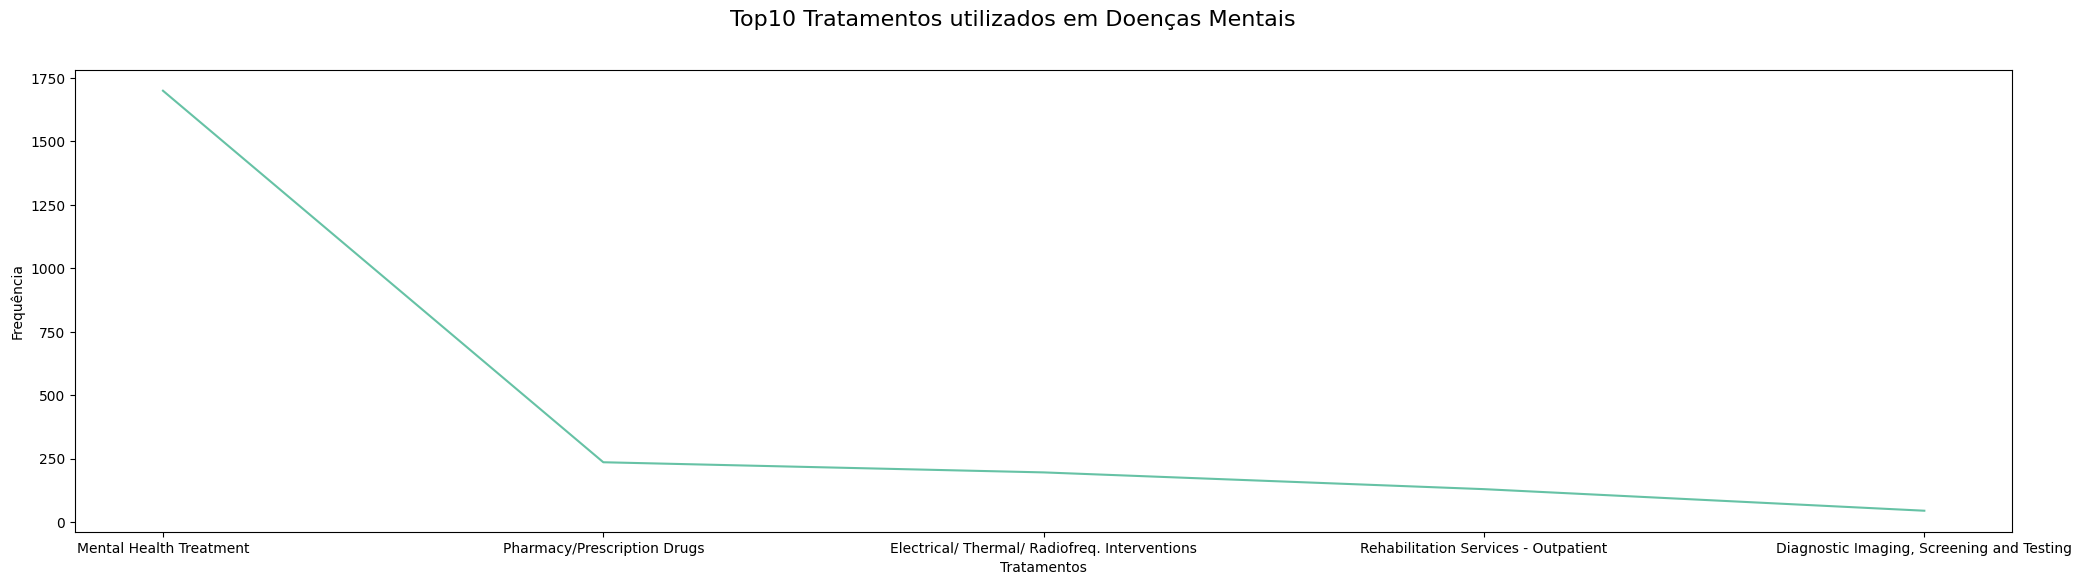

In [17]:
data = dataset[dataset['Diagnosis Category'] =='Mental']

top_10_diseases = data['Treatment Category'].value_counts().nlargest(5).index
df_top_10 = data[data['Treatment Category'].isin(top_10_diseases)]

grouped = df_top_10.groupby('Treatment Category')

counts = grouped.size()

plt.figure(figsize=(25,6))

plt.plot(stacked)

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Top10 Tratamentos utilizados em Doenças Mentais', fontsize=16)
plt.xlabel('Tratamentos')
plt.ylabel('Frequência')

stacked = counts.sort_values(ascending=False)
print(f'Frequências de Treatment Category:')
print(stacked)
print('\n')

Treatment Category
Mental Health Treatment                          1700
Pharmacy/Prescription Drugs                       236
Electrical/ Thermal/ Radiofreq. Interventions     196
Rehabilitation Services - Outpatient              130
Diagnostic Imaging, Screening and Testing          45
dtype: int64


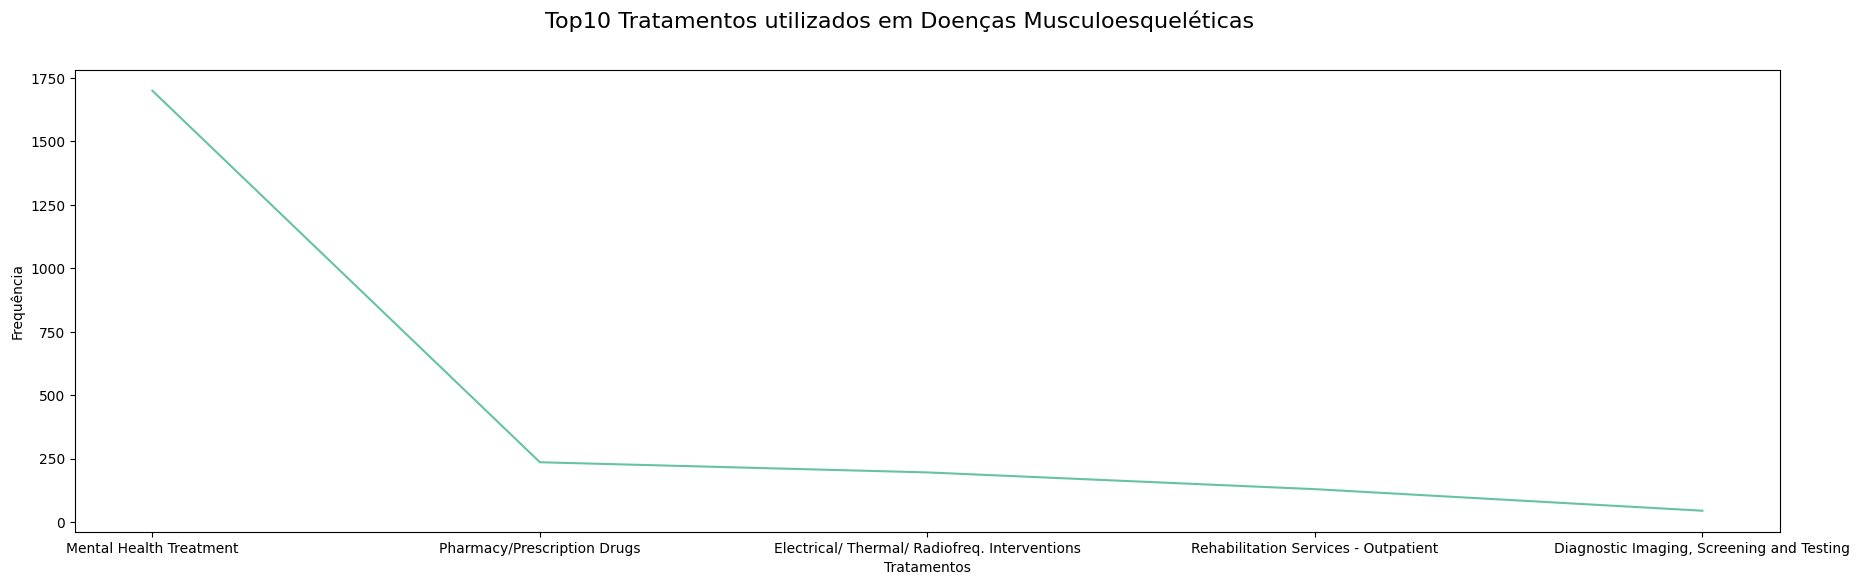

In [22]:
data1 = dataset[dataset['Diagnosis Category'] =='Orthopedic/ Musculoskeletal']


top_10_diseases = data1['Treatment Category'].value_counts().nlargest(10).index
df_top_10_ = data1[data1['Treatment Category'].isin(top_10_diseases)]
grouped1 = df_top_10_.groupby('Treatment Category')
counts1 = grouped1.size()

plt.figure(figsize=(22,6))

stacked1 = counts.sort_values(ascending=False)
plt.plot(stacked1)

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Top10 Tratamentos utilizados em Doenças Musculoesqueléticas', fontsize=16)
plt.xlabel('Tratamentos')
plt.ylabel('Frequência')


print(stacked1)



Observa-se que, para o tratamento dos diagnósticos de Doenças Mentais, o DMHC possui uma grande incidência de tratamento da saúde mental, com 1700 ocorrências, o que é 7x maior que a segunda maior ocorrência, a descrição de remédios farmacêuticos.

Por sua vez, o tratamento de doenças Ortopédicas/Musculoesqueléticas são mais distribuídas, com destaque para os cinco primeiros (que possuem mais de 300 observações).



#### Por fim, pode-se inferir que:

**(1)** Das estatísticas básicas, destaca-se que a maioria dos pacientes que chegam é do tipo de necessidade médica, que as determinações são mantidas pelo plano de saúde, são pessoas entre 41 e 50 anos e do sexo feminino.

**(2)** Ao observar o acompanhamento de diagnósticos ao longo dos anos, é possível observar que a maior preocupação do DMHC são os dois diagnósticos mais observado: Musculoesqueléticas/Ortopédica e Doenças Mentais. Vale ressaltar, que, apesar de grande número de diagnosticados por ano, houve uma redução desses números em 2015 e 2016, quando comparado ao ano de 2014.

**(3)** Ao analisar as doenças por faixa etária, observa-se os maiores diagnósticos entre os 40 e 64 anos. No entanto, vale ressaltar o grande número de diagnósticos de doenças mentais em crianças e adolescentes entre 11 e 20 anos.

**(4)** O DMHC atende, em sua maioria, o público feminino. Este, inclusive, é o majoritariamente o público diagnosticado com gastrointerite, obesidade mórbida e atendimento para ginecologia/obstetricia. Um detalhe a ser observado é a grande participação de mulheres acima dos 40 anos, que pode ser explicado pelo maior número de pessoas que são atendidas com essas características.


**(5)** Em falar em tratamento, os três mais utilizados foram: (1) farmácia e prescrição médica, (2) diagnóstico por imagem e (3) Tratamento da saúde mental.


#### Deste modo, pode-se concluir que:
- O DMHC deve ter uma maior preocupação em relação às duas doenças mais observados: Mental e esqueletomuscular, visto que esses diagnósticos são observados em um patamar elevado ao longo dos anos, diferentemente do que ocorre com infecções, por exemplo. 
- Outro fator que aponta uma maior necessidade de enfoque no tratamento de doenças mentais é o número altamente expressivo de pacientes que receberam tratamento para a saúde mental (1.700 observações).
- Além disso, é possível observar que se deve ter uma melhor abordagem na prevenção de doenças mentais em jovens, principal público diagnosticado. Outra salientação a ser realizada é a alta taxa gestacional entre mulheres acima dos 40 anos, que por sua vez necessita de maiores cuidados médicos para evitar complicações.
- Deste modo, espera-se um hospital na região que tenha atendimento especializado as principais doenças, bem como uma campanha segmentada para a prevenção de diagnósticos que são expressivos em determinados grupos, como 